# DataCamp Certification Case Study

### Project Brief

You are on the data science team for a coffee company that is looking to expand their business into Ukraine. They want to get an understanding of the existing coffee shop market there.

You have a dataset from Google businesses. It contains information about coffee shops in Ukraine. The marketing manager wants to identify the key coffee shop segments. They will use this to construct their marketing plan. In their current location, they split the market into 5 segments. The marketing manager wants to know how many segments are in this new market, and their key features.

You will be presenting your findings to the Marketing Manager, who has no data science background.

The data you will use for this analysis can be accessed here: `"data/coffee_shops.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
# Importing Libraries 
import numpy as np
import pandas as pd

filename = "datasets/coffee_shops.csv"
coffee_shops = pd.read_csv(filename)
coffee_shops.head(10)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True
5,Mariupol,Racers Coffee Shop,Espresso bar,4.6,367.0,$$,False,True,True
6,Mariupol,Займемся Кофе,Coffee shop,4.6,200.0,$$,False,True,True
7,Mariupol,Кофейня Rit Rit,Coffee shop,4.6,292.0,$$,False,NaN,True
8,Mariupol,Кав'ярня My coffee,Coffee shop,4.8,31.0,NaN,NaN,True,True
9,Mariupol,LENЬ. Coffee & desserts.,Coffee shop,4.8,125.0,$$,True,True,True


2. EDA (EXPLORATORY DATA ANALYSIS):
First We had load and print the top five rows of our Dataset in the above cell.
Then to get to more information on our data about the columns dtypes and missing values...We use .info() method on our dataset..

In [2]:
coffee_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            122 non-null    object 
 6   Delivery option  129 non-null    object 
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


As We can look in the above cell that all columns have their dtypes as object except for Reviews and Ratings and some of the columns have missing values as well so now we will count all missing values in their respected columns...

In [3]:
coffee_shops.isna().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price              78
Delivery option    71
Dine in option     60
Takeout option     56
dtype: int64

Now as you can see in the above cell that Rating and Reviews can easily be imputed by the means of their respected columns...But how can we impute missing values in the other columns We cannot also drop the rows cause this will result in so much Loss Of Information. Let's inspect how can we impute them.. 

In [4]:
coffee_shops['Price'].value_counts()

$$     116
$$$      4
$        2
Name: Price, dtype: int64

As we explore the unique values in our column of Price in above cell we can easily see that there are so much same entries so we can easily impute the missing values with the most frequent in the Price column

In [5]:
coffee_shops['Delivery option'].unique()

array([nan, False, True], dtype=object)

As in the above cell there is False,True and missing entry in the Delivery option column There can be a chance that if it is missing then perhaps the shop will not be having a delivery option so we can easily impute the missing values with False as No Delivery option is available....

In [6]:
coffee_shops['Dine in option'].unique()

array([nan, True], dtype=object)

As in the above cell nan will be as no dine in option available so we can impute it with False also in the below cell we can do the same procedure with Takeout option...

In [7]:
coffee_shops['Takeout option'].unique()

array([nan, True], dtype=object)

In [8]:
# IMPUTING ALL MISSING VALUES
coffee_shops['Rating'].fillna(coffee_shops['Rating'].mean(), inplace=True)
coffee_shops['Reviews'].fillna(coffee_shops['Reviews'].mean(), inplace=True)
coffee_shops['Price'].fillna('$$', inplace=True)
coffee_shops['Delivery option'].fillna(False, inplace=True)
coffee_shops['Dine in option'].fillna(False, inplace=True)
coffee_shops['Takeout option'].fillna(False, inplace=True)

Now that We have imputed all the missing values we can know change their dtypes of the columns so that they can result with faster and better analysis...The code is present below

In [9]:
coffee_shops['Region'] = coffee_shops['Region'].astype('category')
coffee_shops['Place type'] = coffee_shops['Place type'].astype('category')
coffee_shops['Price'] = coffee_shops['Price'].astype('category')
coffee_shops['Delivery option'] = coffee_shops['Delivery option'].astype('bool')
coffee_shops['Dine in option'] = coffee_shops['Dine in option'].astype('bool')
coffee_shops['Takeout option'] = coffee_shops['Takeout option'].astype('bool')

3. FURTHER EDA USING VISUALIZATIONS:

Now We will plot a barplot to see the number of shops with respect to its place type in Ukraine....

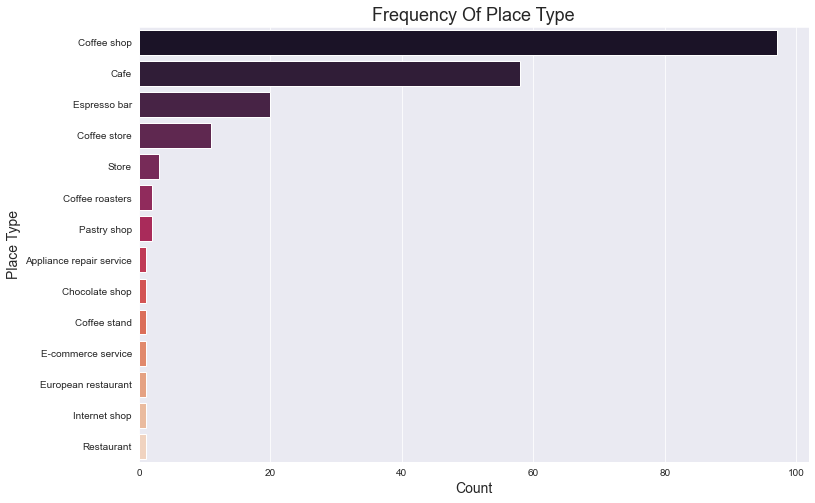

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 

place_type_count = coffee_shops['Place type'].value_counts()
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 8))
order_list = list(place_type_count.index)
sns.barplot(x=place_type_count.values, y=place_type_count.index, order=order_list, palette="rocket")
plt.xlabel("Count", size=14)
plt.ylabel("Place Type", size=14)
plt.title("Frequency Of Place Type", size=18)
plt.show()

As We can look at the upper bar graph We can easily see that Coffee shop is the most popular in Ukraine, Also Cafe then Espresso bar and Coffee store with a low numbers in Ukraine.

Text(0.5, 1.0, 'No Of Reviews According To Place Type With Respect To Delivery Option')

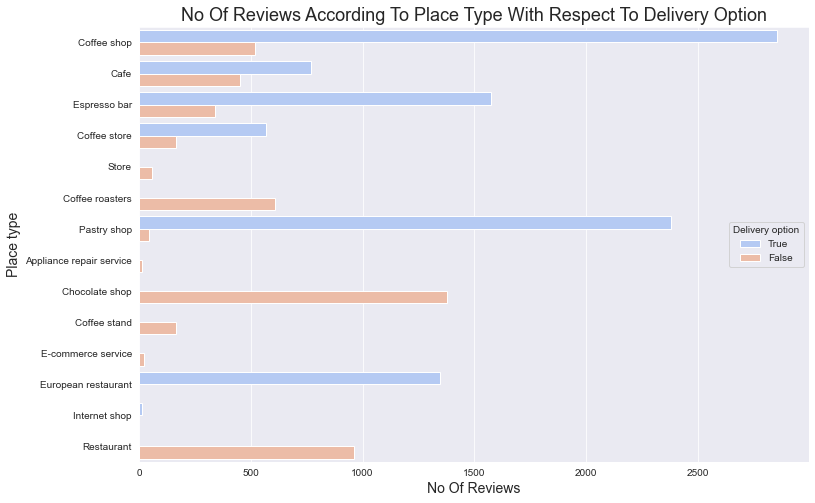

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Reviews", y="Place type", hue="Delivery option", data=coffee_shops, order=order_list, hue_order=[True,False], palette="coolwarm", ci=0)
sns.set_style("darkgrid")
plt.xlabel("No Of Reviews", size=14)
plt.ylabel("Place type", size=14)
plt.title("No Of Reviews According To Place Type With Respect To Delivery Option", size=18)

In the Bar Graph present above We can easliy see Coffee shop is receiving the most number of reviews. It can be because they are in a very huge amount in Ukraine However Pastry shop is receiving the second most number of reviews when they have the delivery option but there are only upto 10 in Ukraine that means when people wants to order coffee they tend to be more likely order from a coffee shop or pastry shop. Also We can observe that people tends to be more likely to give a review when a delivery option is avail  

Text(0.5, 1.0, 'No Of Reviews According To Place Type With Respect To Dine In Option')

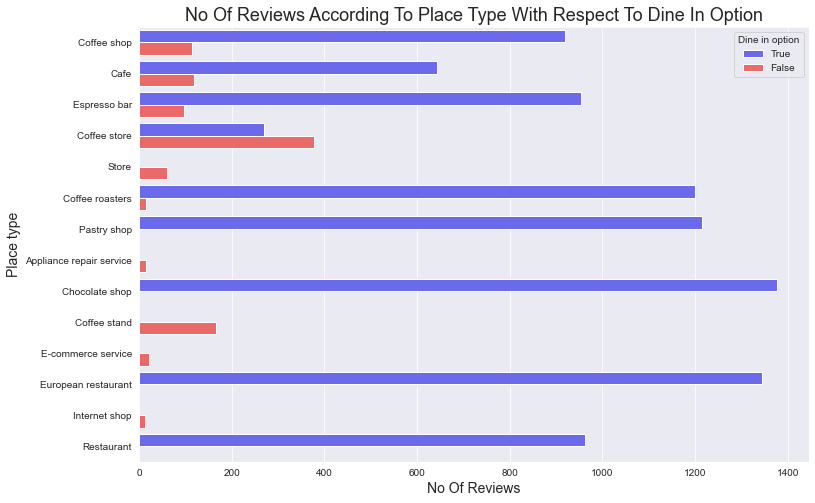

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Reviews", y="Place type", hue="Dine in option", data=coffee_shops, order=order_list, hue_order=[True,False], palette="seismic", ci=0)
sns.set_style("darkgrid")
plt.xlabel("No Of Reviews",size=14)
plt.ylabel("Place type",size=14)
plt.title("No Of Reviews According To Place Type With Respect To Dine In Option", size=18)

In the Bar Graph present above We can easily see that Chocolate shop and European Restaurant are getting most number of reviews with respect to Dine in option however coffee shops are not so much famous in Dine in that is why they are getting less number of reviews than Chocolate shop, European Restaurant, Pastry shop and Coffee roasters... 

Text(0.5, 1.0, 'No Of Reviews According To Place Type With Respect To Takeout Option')

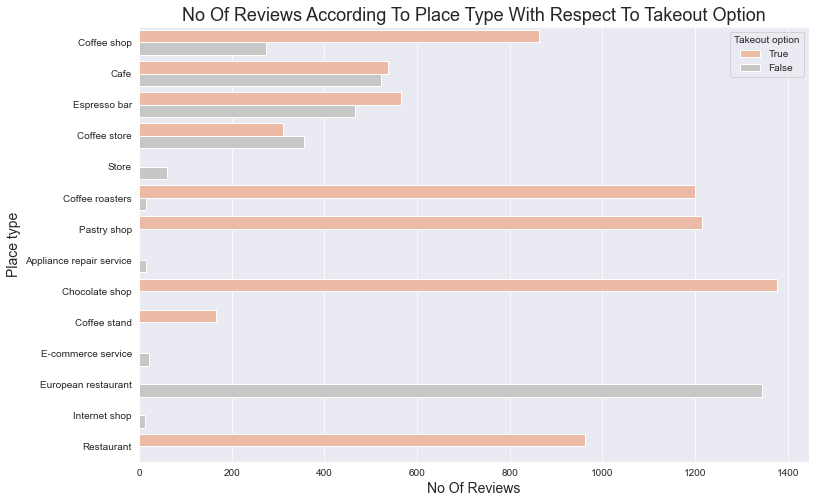

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Reviews", y="Place type", hue="Takeout option", data=coffee_shops, order=order_list, hue_order=[True,False], palette="RdGy", ci=0)
sns.set_style("darkgrid")
plt.xlabel("No Of Reviews",size=14)
plt.ylabel("Place type",size=14)
plt.title("No Of Reviews According To Place Type With Respect To Takeout Option", size=18)

In the Bar graph present above We can easily see that Chocolate shop and Pastry shop are getting most number of reivews when Takeout option is available Also Coffee roasters and Restaurants are generating a good number of reviews when takeout option is available however Coffee shop which is having the most number of shops in Ukraine are not so famous in the takeout option as well. Also European Restaurant is still generating the second highest number of reviews also when takeout option is not available...However we can clearly observe that people tends more likely to give reviews when Takeout option is available...

4. ANALYSIS NOTES:

As per my hypothesis those shops that are having Delivery option and Dine in option and Takeout option available tends to be more likely give more number of reviews however some are famous in their unique way for e.g European Restaurant and Chocolate Shop...Now lets try some unsupervised learning to discover patterns in our data...  

In [14]:
df = coffee_shops.copy()

5. Model Fitting:

As ratings and reviews are the most that impact on the popularity of place type So we will first scale them then we will try to find hidden clusters in them

In [15]:
from scipy.cluster.vq import whiten
df[['scaled_rating','scaled_reviews']] = whiten(df[['Rating','Reviews']])

In [16]:
df.describe()

,Rating,Reviews,scaled_rating,scaled_reviews
count,200.000000,200.000000,200.000000,200.000000
mean,4.663636,622.494949,21.200338,0.447725
std,0.220531,1393.841198,1.002509,1.002509
min,3.900000,3.000000,17.728938,0.002158
25%,4.600000,48.500000,20.911055,0.034883
50%,4.700000,277.000000,21.365643,0.199230
75%,4.800000,780.750000,21.820231,0.561548
max,5.000000,17937.000000,22.729407,12.901047


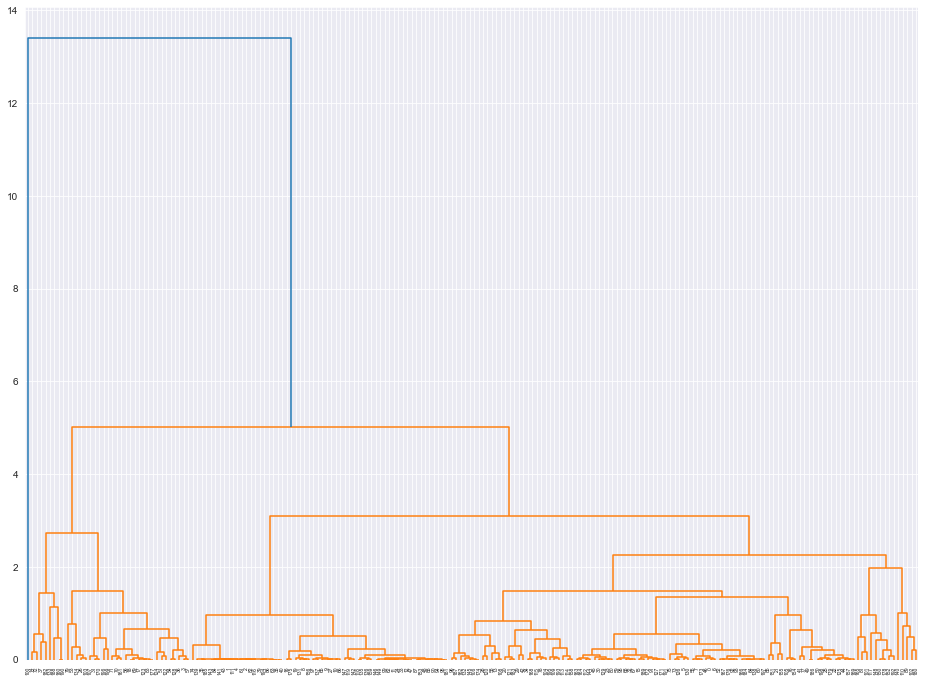

In [17]:
from scipy.cluster.hierarchy import fcluster,linkage, dendrogram

fig, ax = plt.subplots(figsize=(16,12))
distance_matrix = linkage(df[['scaled_rating','scaled_reviews']], method='complete', metric='euclidean')
dn = dendrogram(distance_matrix) # Exploring Our Clusters and getting and idea by plotting a dendrogram
plt.show()

We plot the above dendrogram to see how many clusters are forming from our data

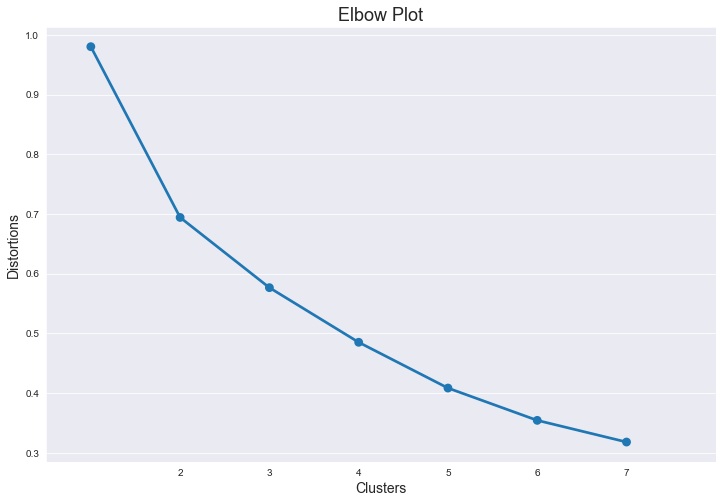

In [18]:
# Lets plot an elbow plot to select right number of clusters
from scipy.cluster.vq import kmeans

distortions = []
num_clusters = range(1,8)

for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_rating','scaled_reviews']], i)
    distortions.append(distortion)
fig, ax = plt.subplots(figsize=(12,8))    
elbow_df = pd.DataFrame({'num_clusters':num_clusters, 'distortions':distortions})
sns.pointplot(x="num_clusters", y="distortions", data=elbow_df)
plt.xticks(num_clusters)
plt.ylabel("Distortions",size=14)
plt.xlabel("Clusters",size=14)
plt.title("Elbow Plot", size=18)
plt.show()

In the above we plot an elbow plot to see how many clusters can be formed

As we can see that last drop down was at 4  and then it did not have a major drop down so we will be using 4 clusters

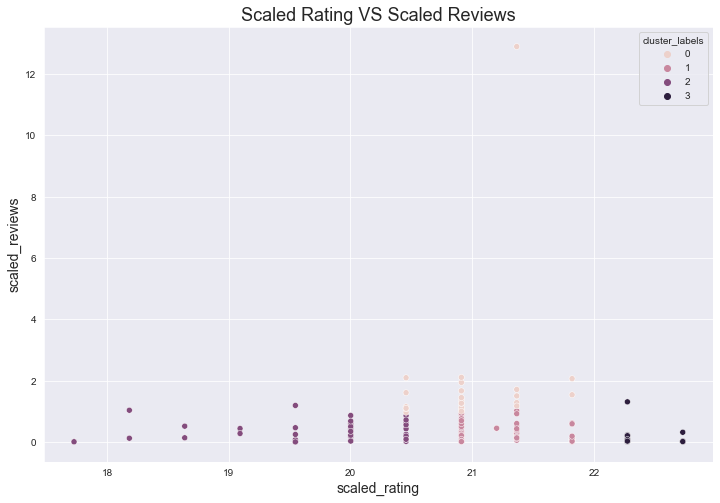

In [19]:
from scipy.cluster.vq import vq
fig, ax = plt.subplots(figsize=(12,8))
np.random.seed(0) # So that it generates the same result everytime...
cluster_centers, distortion = kmeans(df[['scaled_rating','scaled_reviews']], 4)
df['cluster_labels'], distortion_list = vq(df[['scaled_rating','scaled_reviews']], cluster_centers)
sns.scatterplot(x='scaled_rating', y='scaled_reviews', 
                hue='cluster_labels', data = df)
plt.xlabel('scaled_rating',size=14)
plt.ylabel('scaled_reviews',size=14)
plt.title("Scaled Rating VS Scaled Reviews", size=18)
plt.show()

In [20]:
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,scaled_rating,scaled_reviews,cluster_labels
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,$$,False,False,False,20.911055,0.148164,1
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,False,True,22.729407,0.017262,3
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True,22.729407,0.007912,3
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True,20.001879,0.238069,2
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True,22.729407,0.008631,3


In [21]:
df['cluster_labels'].value_counts()

1    87
3    46
2    42
0    25
Name: cluster_labels, dtype: int64

In the above cell we count our clusters

In [22]:
clustered_data = df[['Rating','Reviews','cluster_labels']].groupby('cluster_labels').mean()
clustered_data

,Rating,Reviews
cluster_labels,,
0,4.612000,2586.920000
1,4.677325,406.632068
2,4.357143,471.785714
3,4.945652,100.739130


In the above cell we take the mean of Rating and Reviews of the 4 clusters...

In [23]:
rating_range = clustered_data['Rating'].max() - clustered_data['Rating'].min()
reviews_range = clustered_data['Reviews'].max() - clustered_data['Reviews'].min()

clustered_data['rating_prop'] = (clustered_data['Rating'] - clustered_data['Rating'].min()) / rating_range
clustered_data['reviews_prop'] = (clustered_data['Reviews'] - clustered_data['Reviews'].min()) /  reviews_range
clustered_data

,Rating,Reviews,rating_prop,reviews_prop
cluster_labels,,,,
0,4.612000,2586.920000,0.433055,1.000000
1,4.677325,406.632068,0.544056,0.123037
2,4.357143,471.785714,0.000000,0.149244
3,4.945652,100.739130,1.000000,0.000000


In the above cell we calculate rating proportion and reviews proportion so that we can check cluster have the best performance

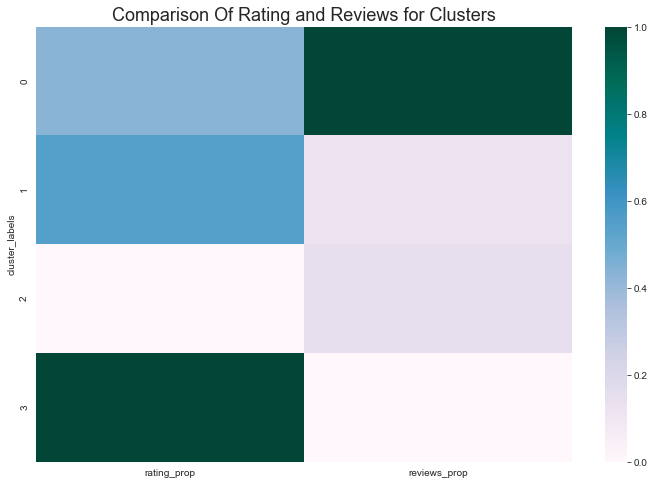

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(clustered_data[['rating_prop','reviews_prop']], cmap='PuBuGn')
plt.title("Comparison Of Rating and Reviews for Clusters", size=18)
plt.show()

As we can see above in the heatmap cluster_label 0 have most effective performance in terms of both rating proportion and reviews proportion as compare to other cluster_labels....

In [25]:
cluster_0 = df[df['cluster_labels'] == 0]
print(f"Count Of Coffee Shops in Cluster 0 is: {len(cluster_0)}")
cluster_0.head()

Count Of Coffee Shops in Cluster 0 is: 25


,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,scaled_rating,scaled_reviews,cluster_labels
20,Poltava,G COFFEE,Coffee shop,4.5,1596.0,$$,True,True,False,20.456467,1.147911,0
21,Poltava,Kavun,Coffee shop,4.7,1785.0,$$,True,True,False,21.365643,1.283847,0
34,Poltava,Lviv Handmade Chocolate,Chocolate shop,4.6,1376.0,$$,False,True,True,20.911055,0.989677,0
42,Kherson,Verona,European restaurant,4.5,1345.0,$$,True,True,False,20.456467,0.967381,0
78,Zaporozhye,Cholla & Joshua,Espresso bar,4.6,1482.0,$$,False,True,False,20.911055,1.065917,0


In the above cell We count number of coffee shops present in cluster 0 which is 25

In [26]:
cluster_0 = cluster_0.reset_index()
cluster_0 = cluster_0.drop('index', axis=1)

In [27]:
cluster_0

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,scaled_rating,scaled_reviews,cluster_labels
0,Poltava,G COFFEE,Coffee shop,4.5,1596.0,$$,True,True,False,20.456467,1.147911,0
1,Poltava,Kavun,Coffee shop,4.7,1785.0,$$,True,True,False,21.365643,1.283847,0
2,Poltava,Lviv Handmade Chocolate,Chocolate shop,4.6,1376.0,$$,False,True,True,20.911055,0.989677,0
3,Kherson,Verona,European restaurant,4.5,1345.0,$$,True,True,False,20.456467,0.967381,0
4,Zaporozhye,Cholla & Joshua,Espresso bar,4.6,1482.0,$$,False,True,False,20.911055,1.065917,0
5,Odessa,Traveler`s Coffee,Coffee shop,4.6,2700.0,$$,True,True,True,20.911055,1.941954,0
6,Odessa,Zheto,Coffee shop,4.8,2141.0,$$,False,True,True,21.820231,1.539898,0
7,Lviv,Lviv Coffee Manufacture,Coffee shop,4.7,17937.0,$$,True,True,True,21.365643,12.901047,0
8,Lviv,Svit Kavy,Coffee shop,4.6,2931.0,$$,False,True,True,20.911055,2.108099,0
9,Lviv,Na bambetli,Coffee shop,4.7,2089.0,$$,False,True,True,21.365643,1.502497,0


Text(0.5, 1.0, 'NUMBER OF COFFEE SHOPS IN CLUSTER 0')

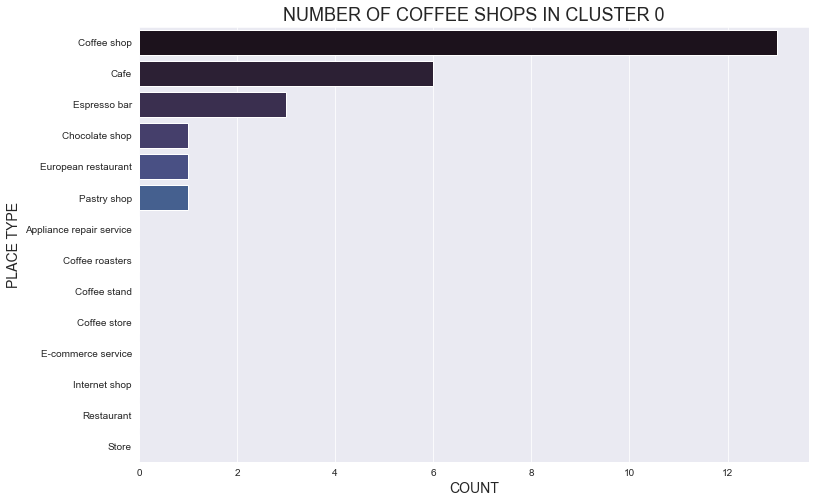

In [28]:
fig, axes = plt.subplots(figsize=(12, 8))
place_type_cluster_0 = cluster_0['Place type'].value_counts()
ordered = list(place_type_cluster_0.index)
sns.barplot(x=place_type_cluster_0.values, y=place_type_cluster_0.index, order=ordered, palette="mako")
plt.xlabel("COUNT",size=14)
plt.ylabel("PLACE TYPE",size=14)
plt.title("NUMBER OF COFFEE SHOPS IN CLUSTER 0", size=18)

5. EVALUATION:

In the Bar Graph above we can clearly see that Coffee Shops, Cafe, Espresso bar, Chocolate shop, European Restaurant, Pastry shop are the most performing shops and get most number of ratings and Reviews...

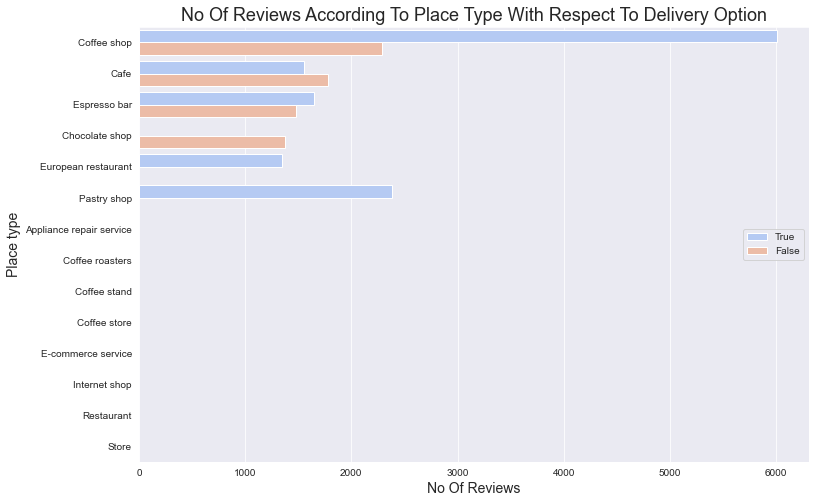

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Reviews", y="Place type", hue="Delivery option", data=cluster_0, order=ordered, hue_order=[True,False], palette="coolwarm", ci=0)
sns.set_style("darkgrid")
plt.xlabel("No Of Reviews",size=14)
plt.ylabel("Place type",size=14)
plt.title("No Of Reviews According To Place Type With Respect To Delivery Option", size=18)
plt.legend(loc=7)
plt.show()

In the Bar graph above We can clearly see that Coffee shop is getting most number of reviews with delivery option...

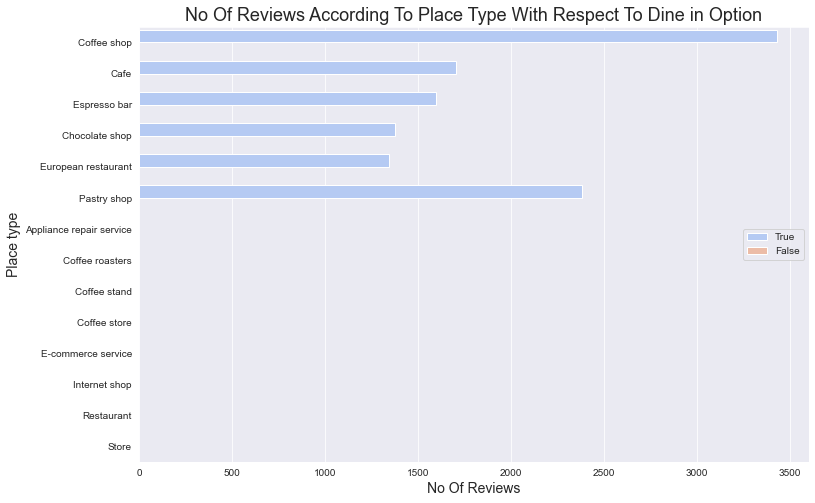

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Reviews", y="Place type", hue="Dine in option", data=cluster_0, order=ordered, hue_order=[True,False], palette="coolwarm", ci=0)
sns.set_style("darkgrid")
plt.xlabel("No Of Reviews",size=14)
plt.ylabel("Place type",size=14)
plt.title("No Of Reviews According To Place Type With Respect To Dine in Option", size=18)
plt.legend(loc=7)
plt.show()

In the Bar graph above we can clearly see that Coffee shop is most performing in cluster 0 even with Dine in option...However in this best performing cluster we can also see that every shop have a dine in option so dine in option is necessary to boost your shop.. 

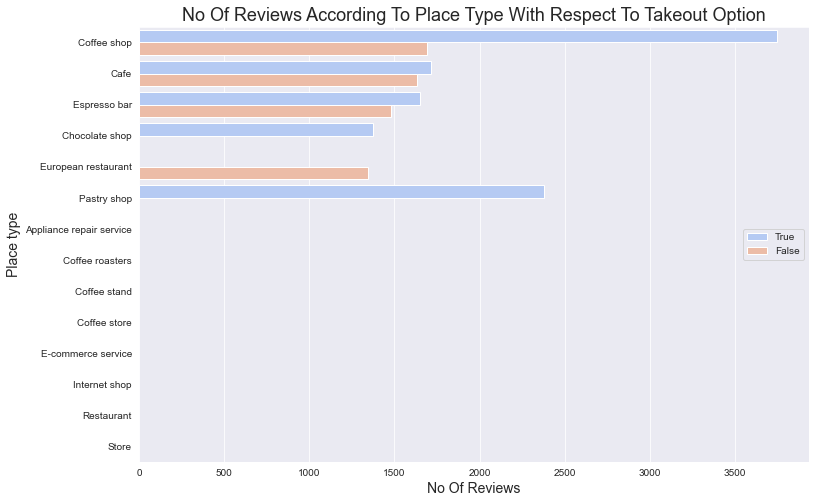

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x="Reviews", y="Place type", hue="Takeout option", data=cluster_0, order=ordered, hue_order=[True,False], palette="coolwarm", ci=0)
sns.set_style("darkgrid")
plt.xlabel("No Of Reviews",size=14)
plt.ylabel("Place type",size=14)
plt.title("No Of Reviews According To Place Type With Respect To Takeout Option", size=18)
plt.legend(loc=7)
plt.show()

In the Bar graph above Coffee shop is still generating most number of reviews when takeout option is available...Also Notice European Restaurant does not have Takeout option still generating a good number of reviews tells us about its uniqueness also all pastry shops in the best performing cluster have Takeout option available...

In [32]:
cluster_1 = df[df['cluster_labels'] == 1]
cluster_2 = df[df['cluster_labels'] == 2]
cluster_3 = df[df['cluster_labels'] == 3]

In [33]:
delivery = cluster_0['Delivery option'] == True
dinein = cluster_0['Dine in option'] == True
takeout = cluster_0['Takeout option'] == True

all_services_0 = cluster_0[delivery & dinein & takeout]
percent_0 = len(all_services_0) / len(cluster_0)

In [34]:
delivery = cluster_1['Delivery option'] == True
dinein = cluster_1['Dine in option'] == True
takeout = cluster_1['Takeout option'] == True

all_services_1 = cluster_1[delivery & dinein & takeout]
percent_1 = len(all_services_1) / len(cluster_1)

In [35]:
delivery = cluster_2['Delivery option'] == True
dinein = cluster_2['Dine in option'] == True
takeout = cluster_2['Takeout option'] == True

all_services_2 = cluster_2[delivery & dinein & takeout]
percent_2 = len(all_services_2) / len(cluster_2)

In [36]:
delivery = cluster_3['Delivery option'] == True
dinein = cluster_3['Dine in option'] == True
takeout = cluster_3['Takeout option'] == True

all_services_3 = cluster_3[delivery & dinein & takeout]
percent_3 = len(all_services_3) / len(cluster_3)

In [37]:
print(f"{round(percent_0 * 100, 2)}% of Coffee Shops have all options available in cluster 0")
print(f"{round(percent_1 * 100, 2)}% of Coffee Shops have all options available in cluster 1")
print(f"{round(percent_2 * 100, 2)}% of Coffee Shops have all options available in cluster 2")
print(f"{round(percent_3 * 100, 2)}% of Coffee Shops have all options available in cluster 3")

28.0% of Coffee Shops have all options available in cluster 0
9.2% of Coffee Shops have all options available in cluster 1
11.9% of Coffee Shops have all options available in cluster 2
6.52% of Coffee Shops have all options available in cluster 3


As we can see in the above cell our cluster_0 which is the best performing cluster also have the most number of shops which have all three options available...They all are whether a Coffee shop or a Cafe or an Espresso bar....

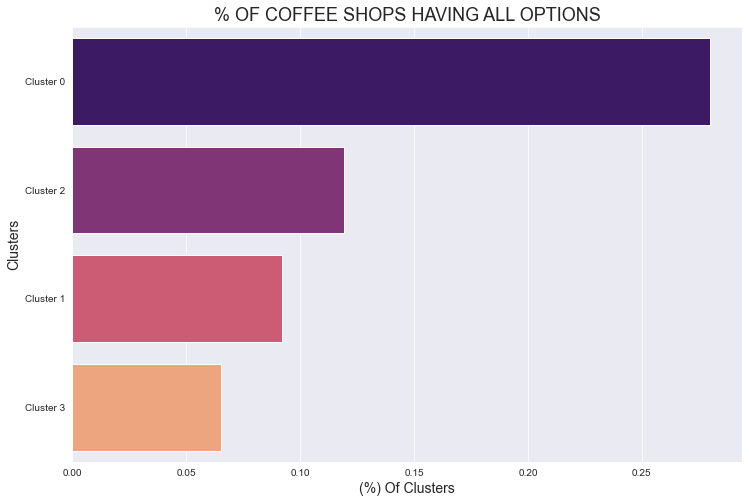

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
clusters = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"]
percentages = [percent_0, percent_1, percent_2, percent_3]
sns.barplot(x=percentages, y=clusters, palette="magma", order=["Cluster 0","Cluster 2","Cluster 1","Cluster 3"])
plt.xlabel("(%) Of Clusters",size=14)
plt.ylabel("Clusters",size=14)
plt.title("% OF COFFEE SHOPS HAVING ALL OPTIONS", size=18)
plt.show()